# **Credit Card Fraud (Anomaly) Detection Using Gaussian Mixture Model (GMM)**

In this project two different approaches based on Gaussian mixture model are explained and programmed for anomaly detection. A credit card dataset is used for this purpose, and anomaly detection in this context means credit card fraud detection. 

# Exploratory Data Analysis

The dataset is called `creditcard.csv` and contains 28 key features ('V1' to 'V28') which are not directly interpretable but contain meaningful information about the dataset. 'Time' and 'Amount' are the other two features present aside from the 28 main features. Column 'Class' contains binary targets where 1 corresponds to fraudulent transactions and 0 corresponds to valid transactions. Let's import the dataset and get started with some exploratory data analysis.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=adfc9a805c05185b1e6f14ddef84b6bb1a7311a2e179fe4e442e3782b4952283
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [4]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print('Features: {}'.format(df.columns.values))

Features: ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


In [7]:
print('Targets: {}'.format(set(df['Class'])))  # set(df['Class'].values)  # 1 corresponds to fraudulent transactions, 0 otherwise

Targets: {0, 1}


In [8]:
# Three different commands for the number of rows or transactions

# print('number of rows:', df.shape[0])
# print('number of rows:', len(df))
print('Number of rows (transactions):', len(df.index))  # Faster than len(df)

Number of rows (transactions): 284807


In [9]:
N_r = len(df)  # Number of transactions
N_v = len(df[df['Class']==0])  # Number of valid transactions
N_f = len(df[df['Class']==1])  # Number of fraudulent transactions

In [10]:
print ('Number of transactions:', N_r)
print ('\nNumber of valid transactions:', N_v)
print ('Number of fraudulent transactions:', N_f)
print ('\nPercentage of valid transactions:', '%.3f' % (N_v/N_r*100), '%')
print ('Percentage of fraudulent transactions:', '%.3f' % (N_f/N_r*100), '%')

Number of transactions: 284807

Number of valid transactions: 284315
Number of fraudulent transactions: 492

Percentage of valid transactions: 99.827 %
Percentage of fraudulent transactions: 0.173 %


## Answering some questions

* What is the percentage of entries in the dataset for each class? 
 - Number of transactions:  284807
 - Number of valid transactions:  284315
 - Number of fraudulent transactions:  492
 - Percentage of valid transactions:  99.827%
 - Percentage of fraudulent transactions:  0.173%
* Is this data considered balanced or unbalanced? Why is this the case?
 - This data is highly unbalanced. The reason is that about 99.827% of the data is related to valid transactions while the percentage of fraudulent transactions is only about 0.173% which is very small compared to the valid transactions.
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example?
 - In KNN if we increase k (the number of nearest neighbors), then it is more likely that the class which has more samples will be dominant because the dataset is unbalanced. In fact, if the data is highly unbalanced, it means that there are much more samples of a specific class in the dataset. This means that for a larger number of k in KNN there will be probably more samples of the dominant class in the neighborhood of the point of interest, and it will be difficult to detect anomalies and outliers in that case. 
  - In general, in case of class imbalance (not only for KNN) there will be some problems with performance assessment. In case of class imbalance some performance measures cannot be used as they are sensitive to class imbalance. For example accuracy is sensitive to imbalance. We can instead use balance accuracy or Matthews Correlation Coefficient or AUC which are less sensitive to class imbalance.

## Splitting the data

Next, the dataset is split into a training and testing set. We use a test size of one third and set the random state to 1.

In [11]:
## Split the data ##

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=1/3, random_state=1)

## Visualizing the features

Here, the distribution of the main features in training set will be displayed to see whether the individual (marginal) distributions look like Gaussian distribution or not. 

In [12]:
from scipy import stats  # stats package of scipy allows us to model various statistical distributions
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

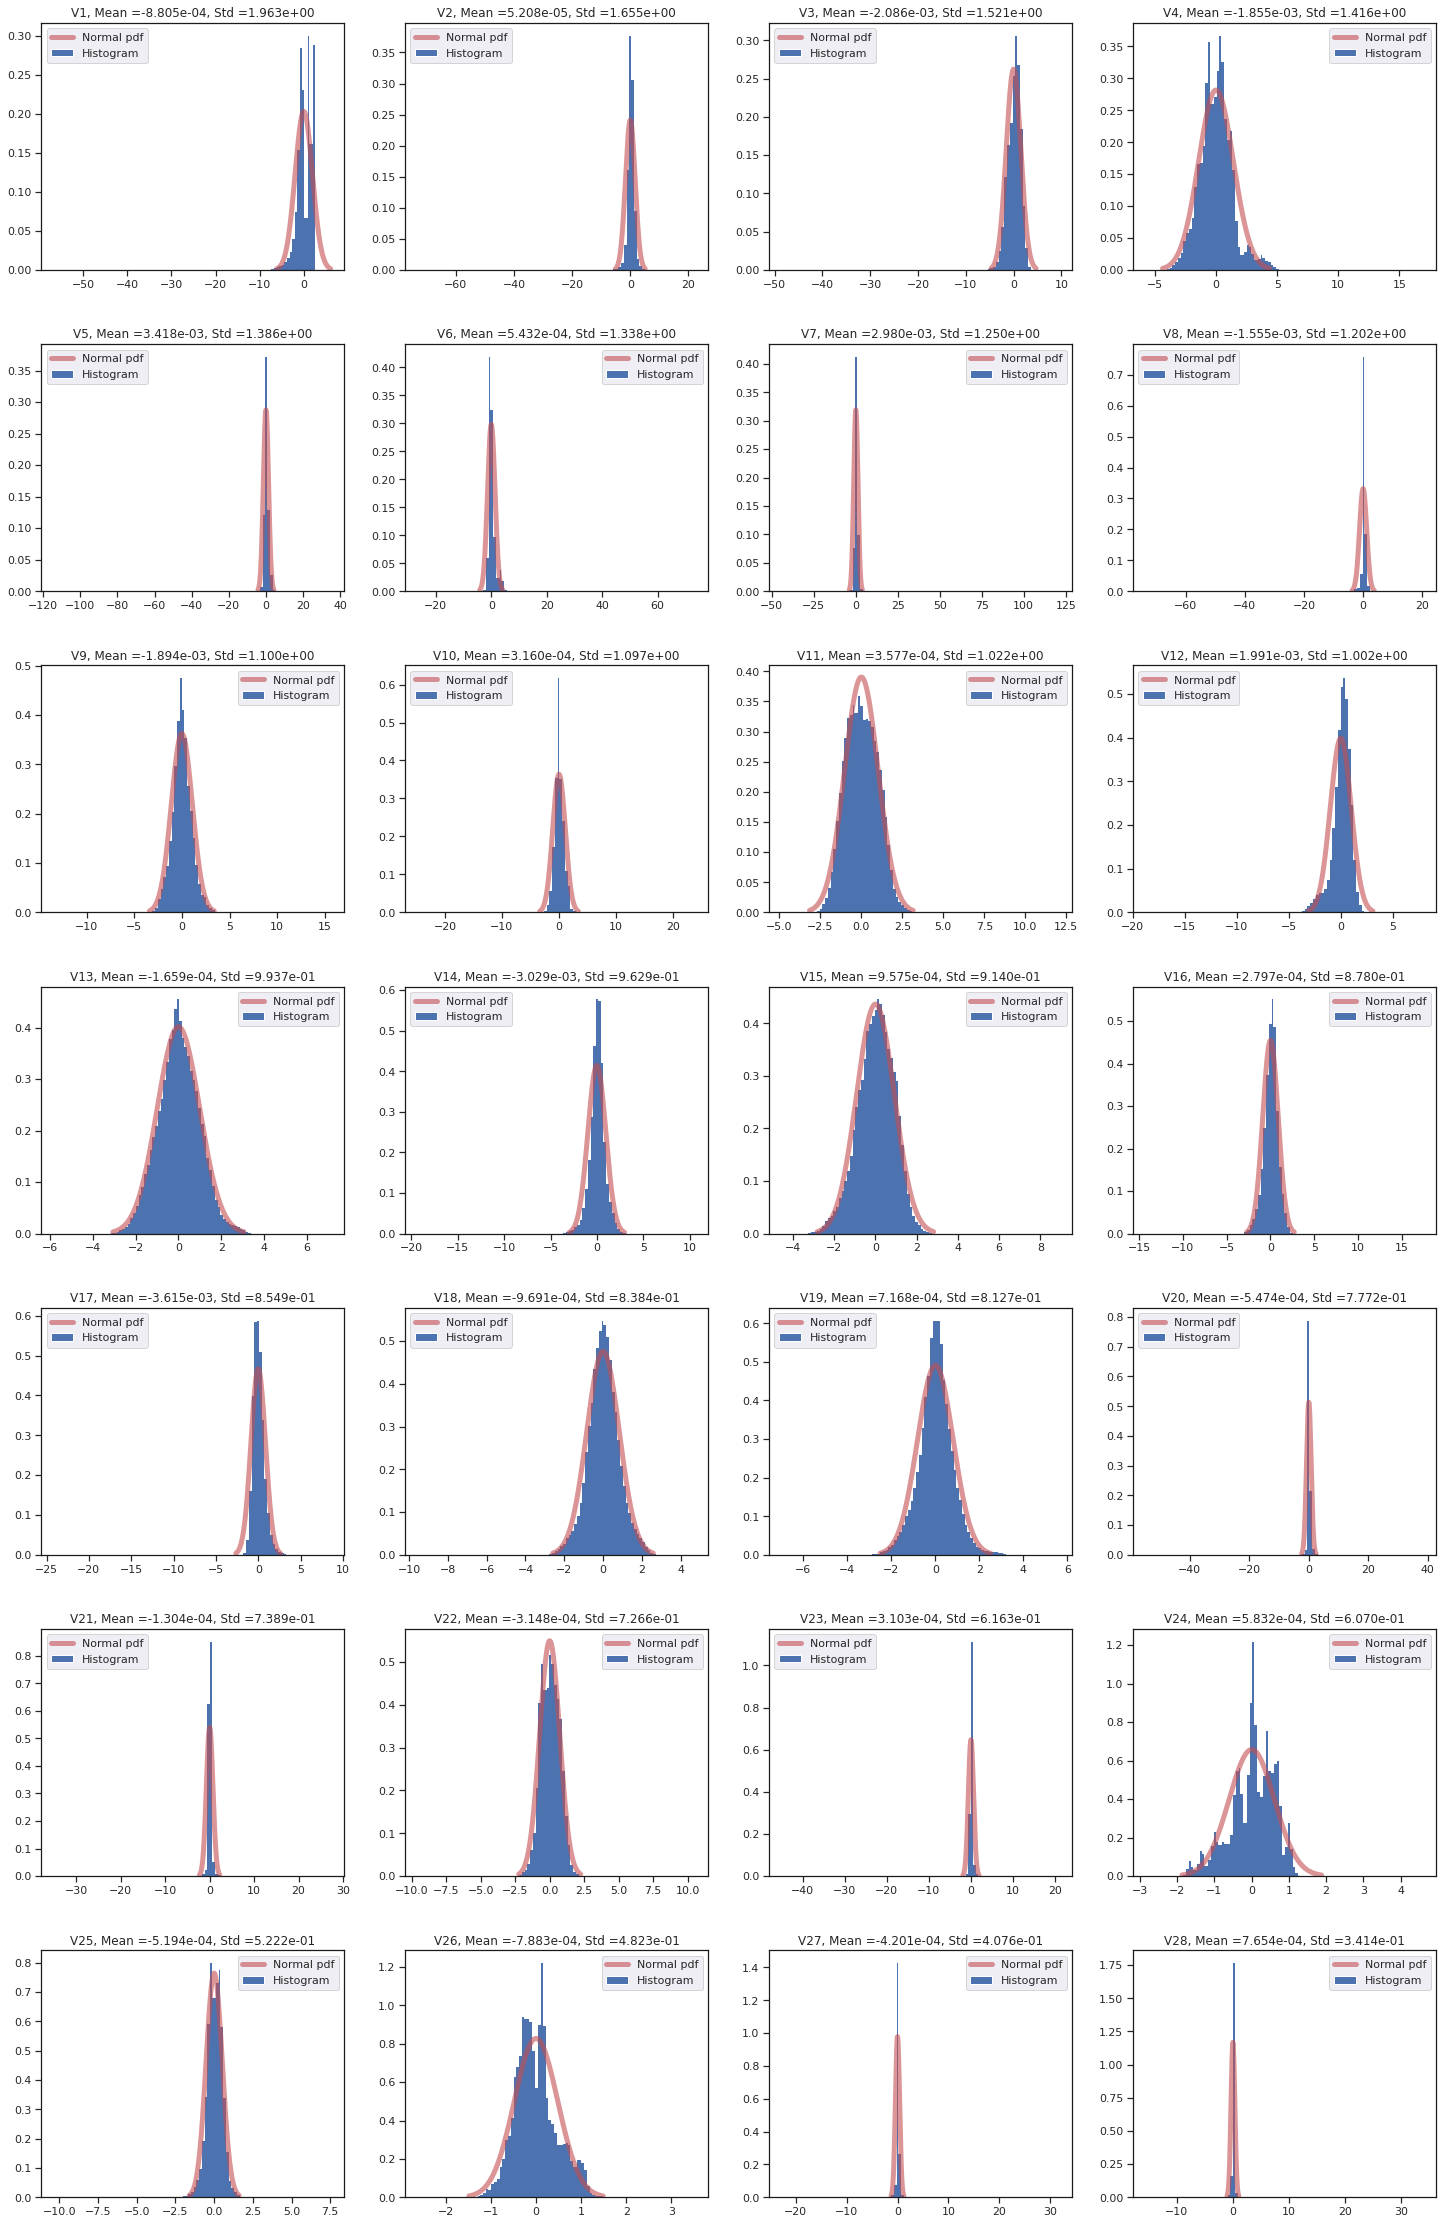

In [13]:
features = [f for f in df.columns if 'V' in f]

plt.figure(figsize=(25, 40))
gs = gridspec.GridSpec(7, 4, hspace=0.3)

for i, feature in enumerate(features):

  mean_feature = X_train[feature].mean()  # Mean of each feature using training set 
  std_feature = X_train[feature].std()  # Standard deviation of each feature using training set 
  norm = stats.norm(loc = mean_feature, scale = std_feature)  # Scipy's Gaussian distribution class is called norm. It takes two parameters, 
                                                              # loc which corresponds to the mean of distribution, and scale which corresponds 
                                                              # to the standard deviation

  ax = plt.subplot(gs[i])
  ax.grid(False)
  ax.set_facecolor('w')
  for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_color('k')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)  # ppf is percent point function (inverse of cdf) 
  ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='Normal pdf')
  ax.hist(X_train[feature].values, density=True, histtype='stepfilled', label='Histogram', bins=100)

  ax.set_title(feature + ', Mean =' +  '{:.3e}'.format(mean_feature) + ', Std =' + '{:.3e}'.format(std_feature))    
  if feature in ['V1', 'V2', 'V3', 'V5', 'V8', 'V10', 'V12', 'V14', 'V17', 'V18', 'V19', 'V20', 'V21', 'V23']:
    ax.legend(loc='upper left')
  else:
    ax.legend(loc='best')

## Visualizing fraudulent and non-fraudulent transactions

We can also look at the difference in distribution of fraudulent and non-fraudulent transactions for each feature. Features for which there is less overlap between the distribution fitted to fraudulent and non-fraudulent transactions are better choices for anomaly detection. For these cases it is easier to distinguish between fraudulent and non-fraudulent transactions and AUC will be closer to 1. Examples of these features are 'V10', 'V12' and 'V14'. In comparison, features for which there is more overlap between the distribution fitted to fraudulent and non-fraudulent transactions are not good candidates for anomaly detection, as it will be difficult to distinguish between fraudulent and non-fraudulent transactions in these cases and AUC will be closer to 0.5. Examples of these features are 'V24', 'V25' and 'V26'.

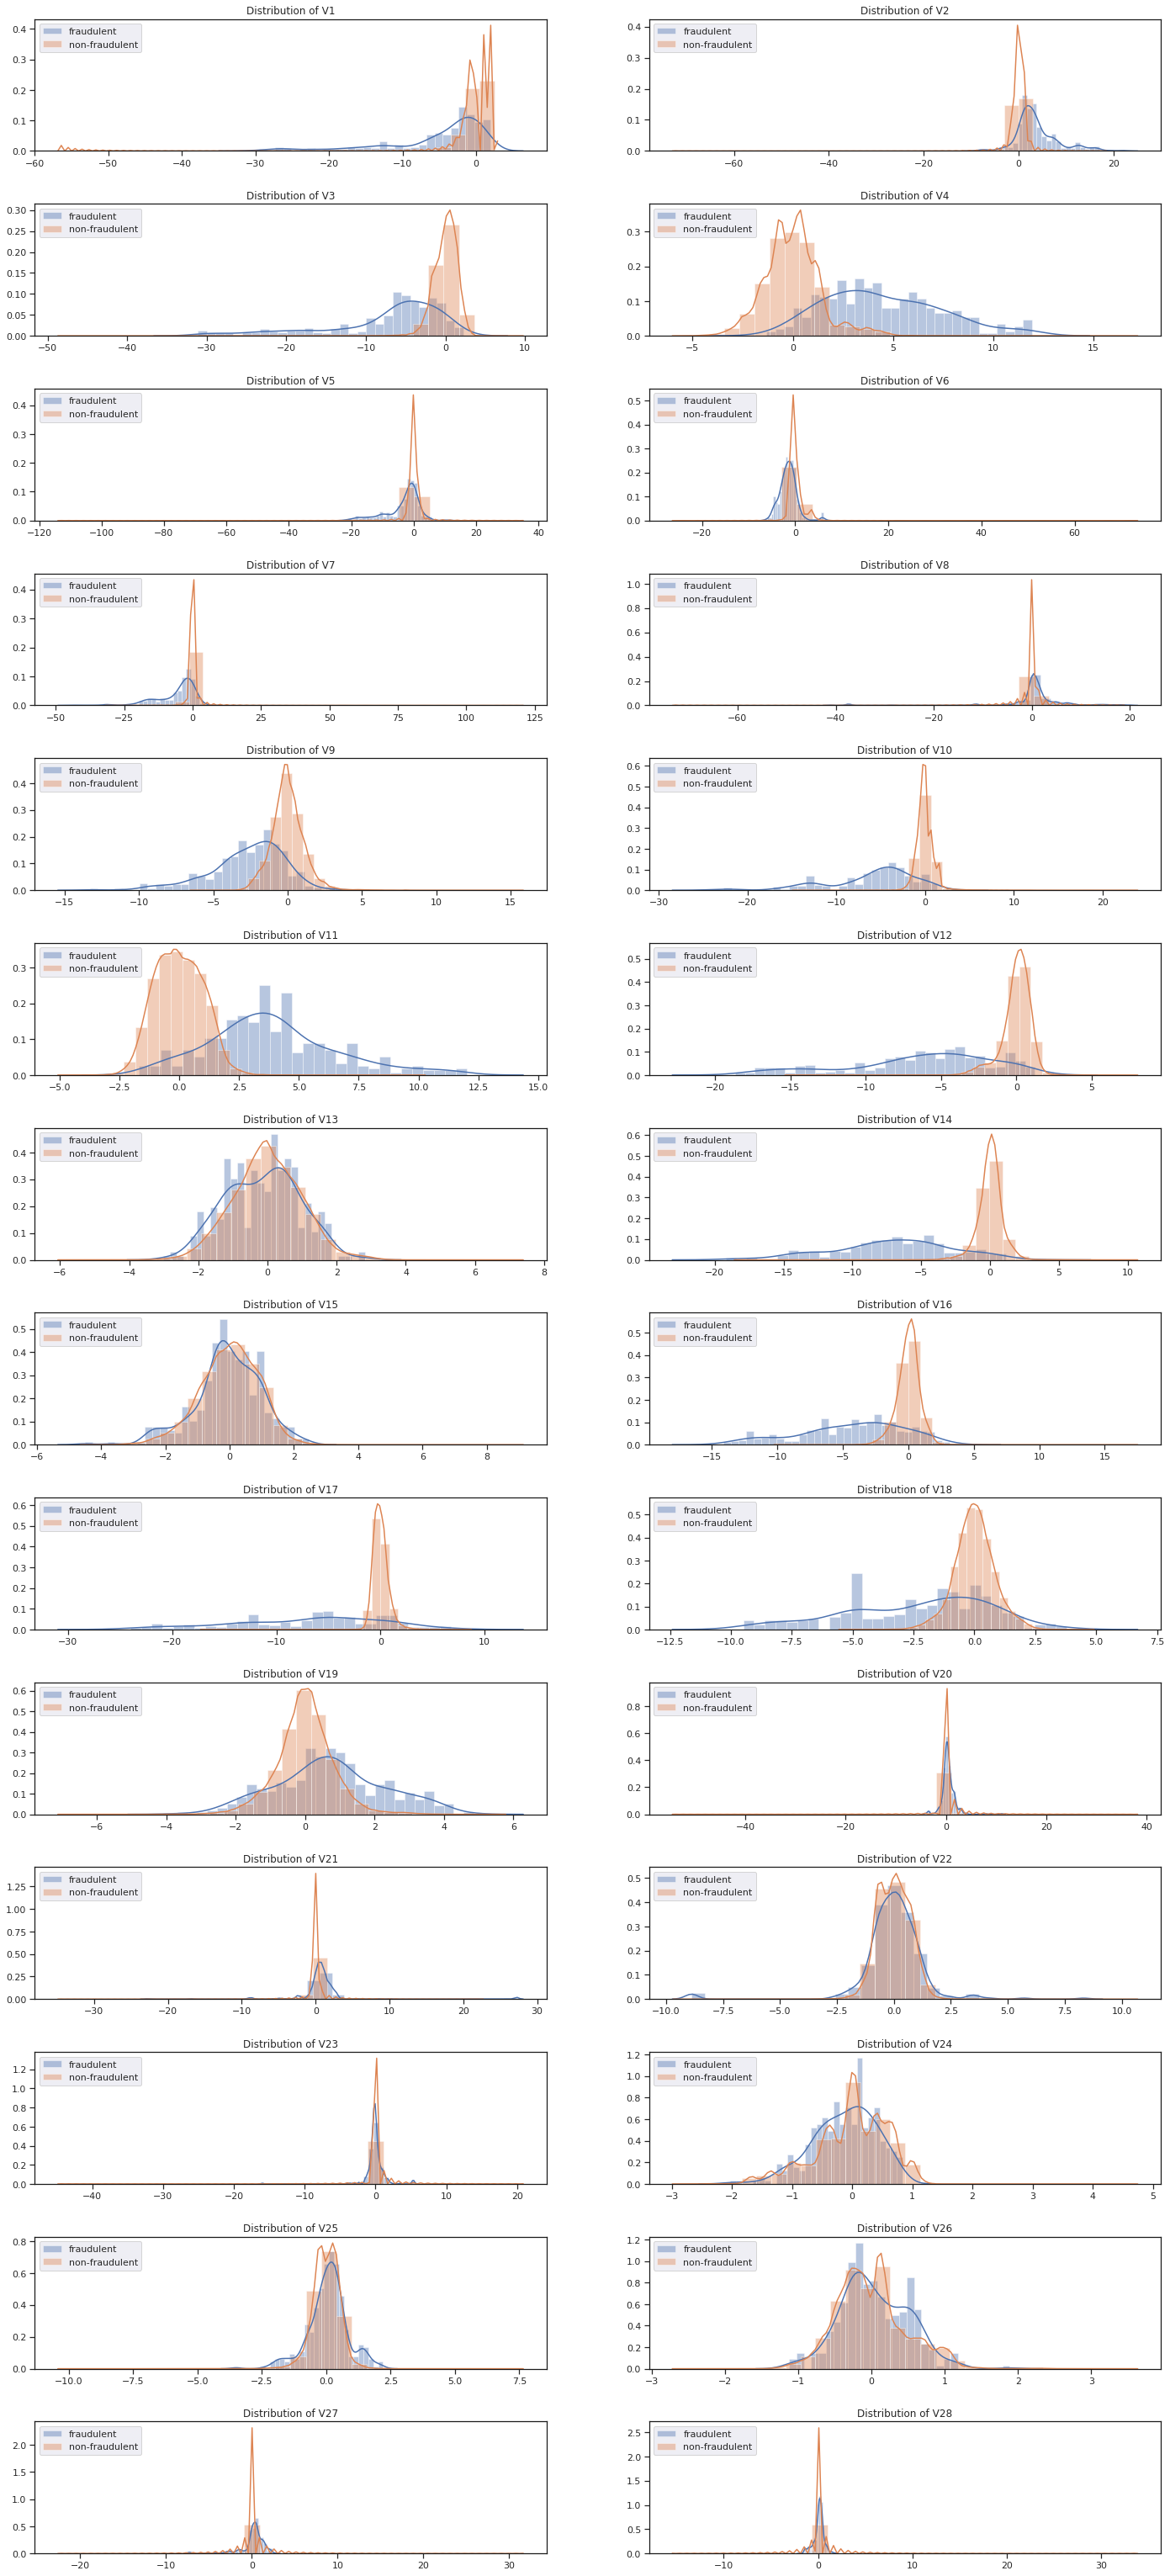

In [14]:
nplots = np.size(features)
plt.figure(figsize=(24, 4*nplots))
gs = gridspec.GridSpec(nplots, 2, hspace=0.4)

for i, feature in enumerate(features):
  ax = plt.subplot(gs[i])
  ax.grid(False)
  ax.set_facecolor('w')
  for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_color('k')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  sns.distplot(X_train[feature][y_train==1], bins=30)
  sns.distplot(X_train[feature][y_train==0], bins=30)

  ax.set_xlabel('')
  ax.legend(['fraudulent', 'non-fraudulent'], loc='upper left')
  ax.set_title('Distribution of ' + feature)

# Preliminary Assessment of Important Features

In this section, we examine the importance of every main feature. We use two methods for this. In the first method, for each feature, one univariate Gaussian distribution having only one component is fitted to non-fraudulent transactions of the training set. In the next step, a threshold is defined and incrementally changed based on the probability of each point in the distribution. Then, the ROC curve is plotted for each feature in the training set, and features are ordered based on the AUC calculated for the ROC curve.

In the second method we will visualize the correlation matrix of our dataset using a heatmap. We will examine correlation of different features with each other and with target 'Class'. It is seen that there is no strong correlation between the main features. Therefore we don't drop any of them based on having strong correlation with each other. But they will be ordered based on their correlation with 'Class'.

## ROC and AUC for each feature

For each feature a univariate Gaussian object with one component is fitted to non-fraudulent transactions of the training set. Then, the ROC curve is plotted and AUC is calculated. Later features will be ordered based on AUC.

In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

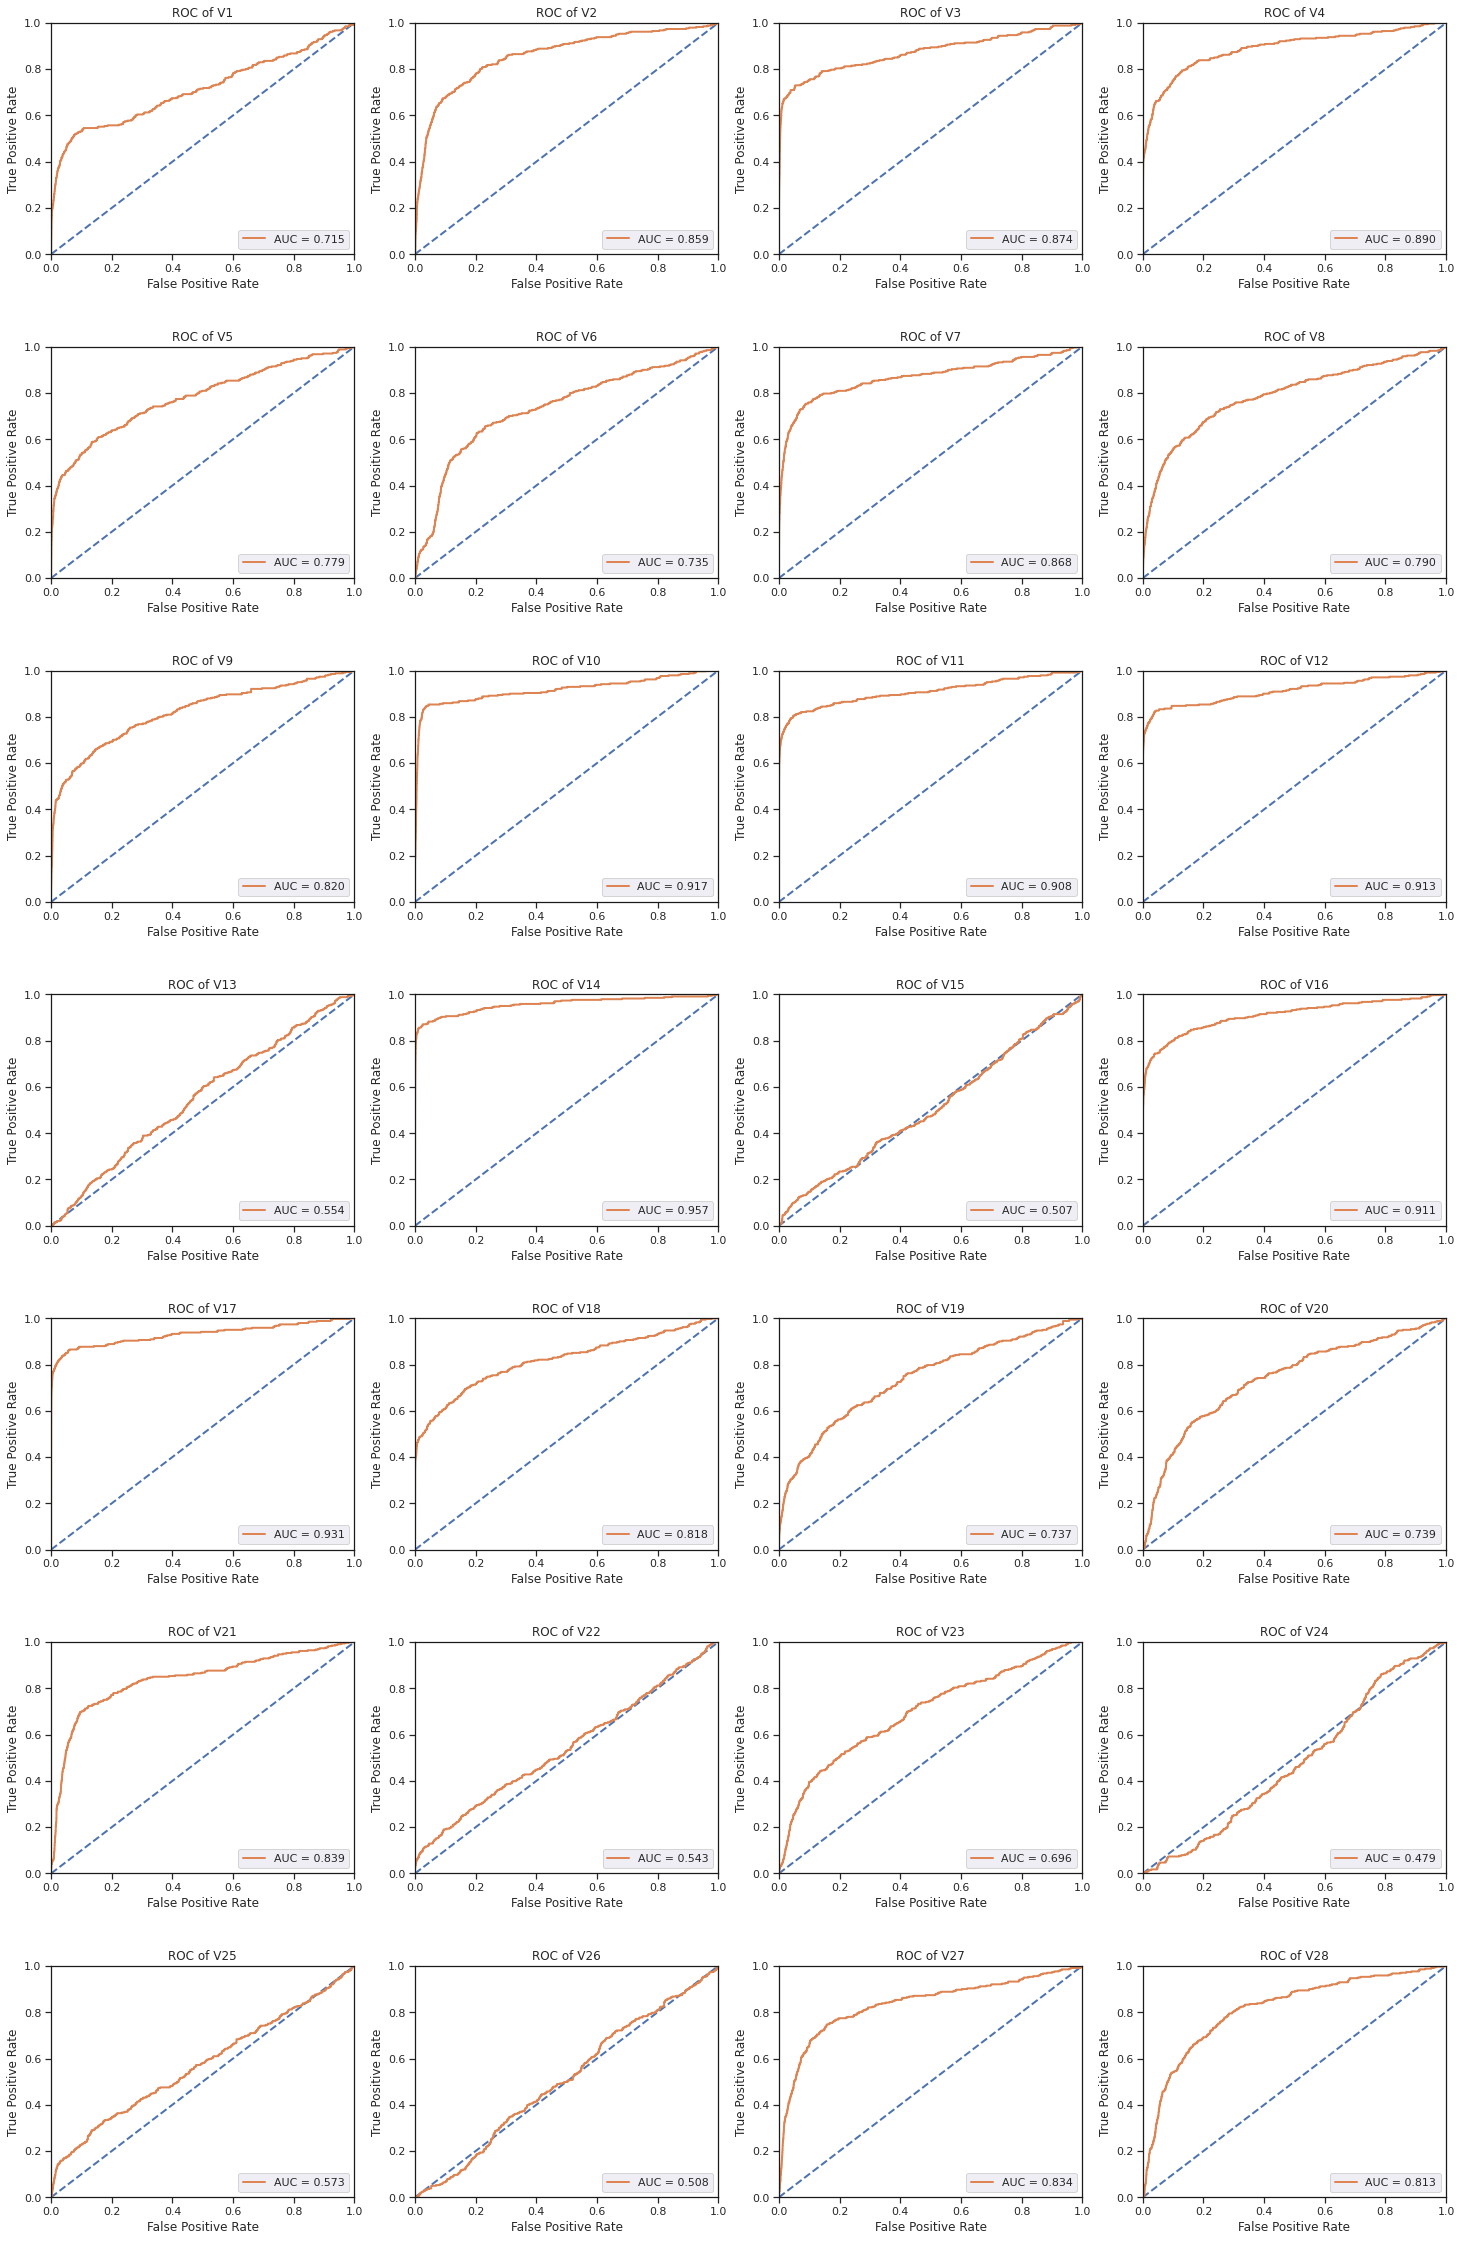

In [16]:
## Plotting ROC and calculating AUC for each feature ##

gm = GaussianMixture(random_state=0)  # Default for n_components is 1, and for covariance_type is 'full'

plt.figure(figsize=(25,40))
gs = gridspec.GridSpec(7, 4, hspace=0.4)

AUC = []  # A list of auc for all the features to find the best feature

for i, feat in enumerate(features):
  gm.fit(X_train[feat][y_train==0].values.reshape(-1,1))  # Estimate model parameters with the EM algorithm, accepts 2D input

  p_gm = gm.score_samples(X_train[feat].values.reshape(-1,1))  # score_samples will compute the weighted log probabilities for each sample
  fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)  # Target scores, can either be probability estimates of the positive class 
  auc = roc_auc_score(y_train, 1-p_gm)  # The scores must be the scores of the class with the greater label

  AUC.append(auc)

  ax = plt.subplot(gs[i])
  ax.grid(False)
  ax.set_facecolor('w')
  for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_color('k')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.plot([0, 1], [0, 1], lw=2, linestyle='--')
  ax.plot(fpr_gm, tpr_gm, lw=2, label='AUC = ' + '%.3f' % auc)
  
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.0])

  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('ROC of ' + feat)
  ax.legend(loc="lower right")

## Correlation heatmap 

Let's visualize the correlation matrix of our dataset using a heatmap. As it is seen in the following heatmap there is no strong or significant correlation between the main features ('V1' to 'V28'). Therefore, we don't drop any of the main columns (features) based on having strong correlation with each other. There is however obvious correlation between 'Class' and some of the main features. Later the main features will be ordered based on their correlation with 'Class'. The weak correlation between 'Time' and 'Amount' with 'Class' also justifies not including them in our anomaly detection algorithm.

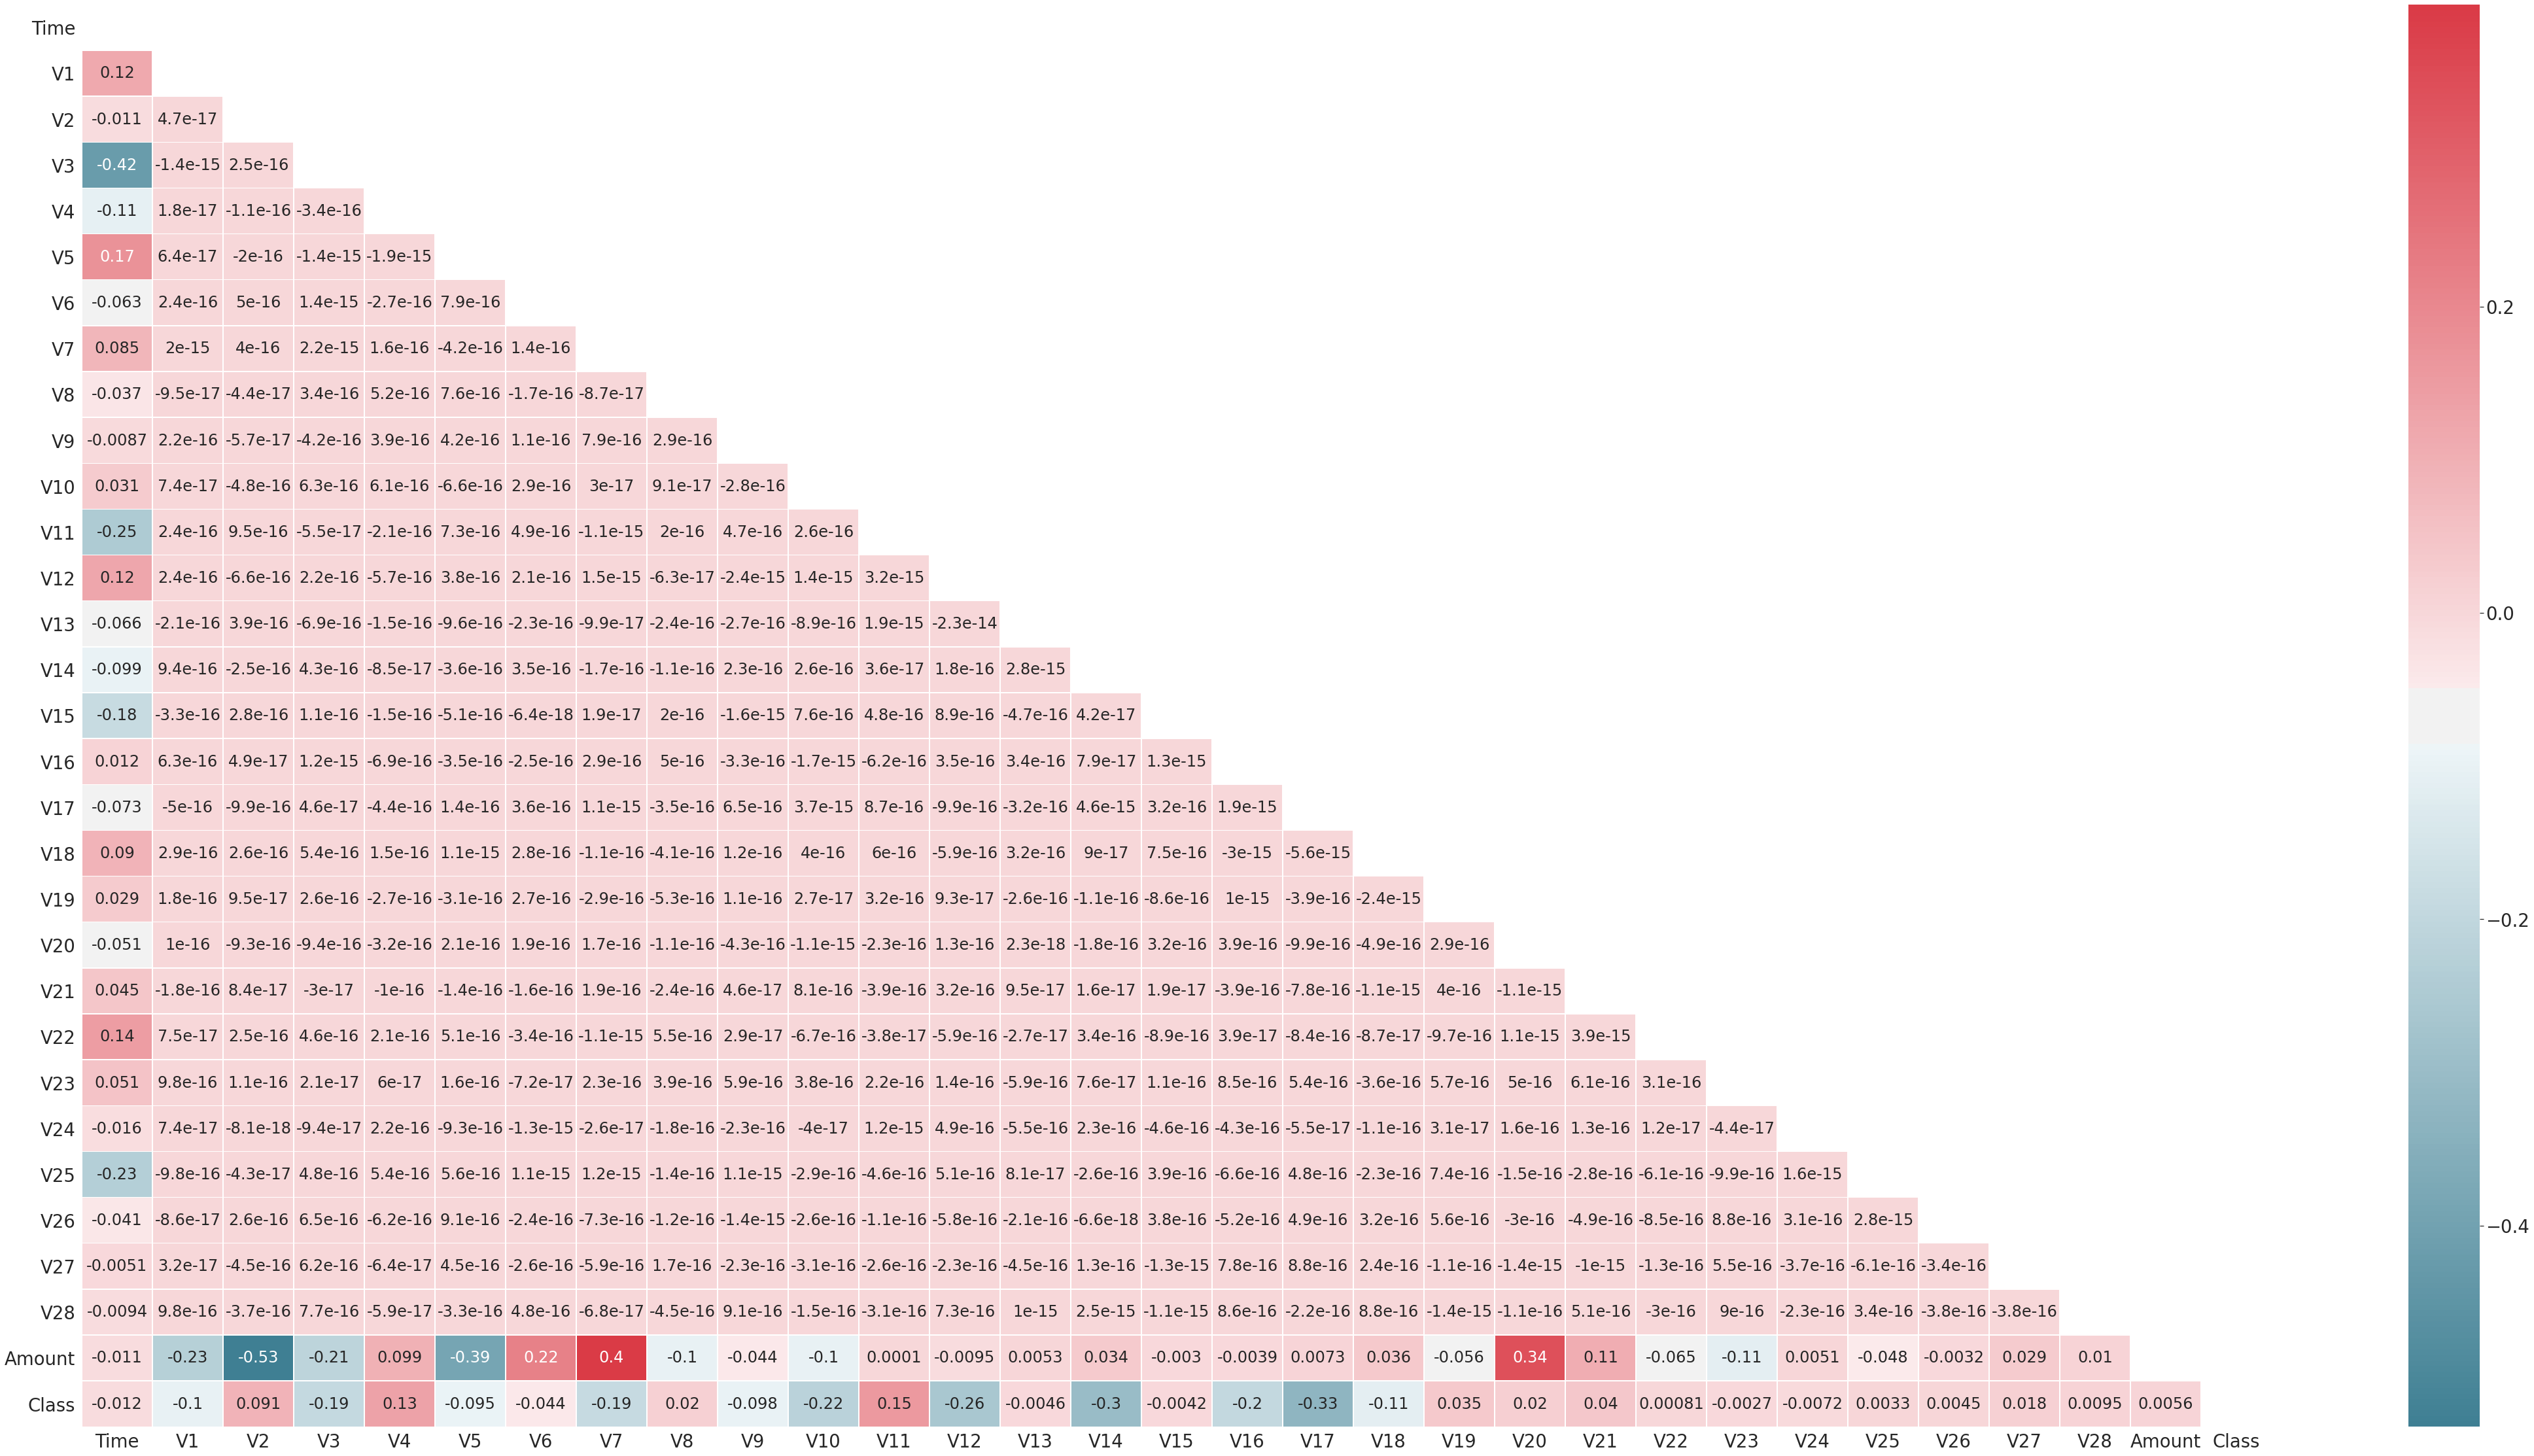

In [17]:
## Heatmap of correlation between columns of df ##

Correlation = df.corr()

sns.set(font_scale=2.5)
mask = np.triu(np.ones_like(Correlation, dtype=np.bool))  # Generate a mask for the upper triangle
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Generate a custom diverging colormap

with sns.axes_style("white"):
  ax = plt.figure(figsize=(75, 40))
  ax = sns.heatmap(Correlation, mask=mask, cmap=cmap, linewidths=.5, annot=True, annot_kws={"size": 24})

sns.set(font_scale=1)

## Ordering features

In the following table (a new dataframe we created), features are ordered based on two main factors, AUC and correlation with 'Class'. In the first two columns features are ordered based on the AUC of the training data obtained using univariate one Gaussian distribution. In the last two columns features are ordered based on the absolute value of correlation between them and 'Class'. Here, the overall observation is that for the features with higher AUC there is stronger correlation with 'Class'.

In [18]:
## Creating a dataframe for ordering features based on AUC and Correlation ##

Correlation['Class abs'] = Correlation['Class'].abs()  # Absolute value of 'Class' in a new column
Correlation.sort_values(by='Class abs', ascending=False, inplace=True)  # Sorting the dataframe based on the absolute value of correlation with 'Class'

Corr_with_Class = Correlation[['Class']]  # A new dataframe including only 'Class'
Corr_with_Class.drop(['Class', 'Time', 'Amount'], inplace=True)  # Eliminating unnecessary rows
Corr_with_Class.reset_index(inplace=True)  # Putting the ordered features in a new column
Corr_with_Class.rename(columns={'Class': 'Correlation with Class', 'index': 'Features'}, inplace=True)

features_AUC = pd.DataFrame({'AUC': AUC}, index=features)  # A new dataframe for ordering features based on AUC
features_AUC.sort_values(by='AUC', ascending=False, inplace=True)
features_AUC.reset_index(inplace=True)  # Putting the ordered features in a new column
features_AUC.rename(columns={'index': 'Features'}, inplace=True)

df_Corr_AUC = pd.concat([features_AUC, Corr_with_Class], axis=1)  # Concatenating the previous two dataframes
df_Corr_AUC.insert(2, '      ', '      ')  # Creating space between the first two and the last two columns
print(df_Corr_AUC.to_string(justify='center', index=False))  # Displaying data at the center of their cells

Features     AUC           Features  Correlation with Class
   V14    0.957095            V17          -0.326481       
   V17    0.931163            V14          -0.302544       
   V10    0.917244            V12          -0.260593       
   V12    0.912987            V10          -0.216883       
   V16    0.910871            V16          -0.196539       
   V11    0.908353             V3          -0.192961       
    V4    0.890087             V7          -0.187257       
    V3    0.873517            V11           0.154876       
    V7    0.867762             V4           0.133447       
    V2    0.859072            V18          -0.111485       
   V21    0.839055             V1          -0.101347       
   V27    0.834407             V9          -0.097733       
    V9    0.819880             V5          -0.094974       
   V18    0.817947             V2           0.091289       
   V28    0.813196             V6          -0.043643       
    V8    0.789945            V21       

## Number of features

In the following analysis, for each approach, 28 different number of features are tested as inputs. As is seen in the above table the order of correlation between main features and 'Class' does not show a major difference with the order of features based on AUC, at least for the top features. Therefore, for the following analysis we will stick to the order of features based on AUC. For any number of input features we start from the top. For example, for a model with one input feature we choose 'V14' which is the top feature based on AUC. For two input features we use 'V14' and 'V17'. For three input features we use 'V14', 'V17' and 'V10', and so on.

In [19]:
Features = df_Corr_AUC.iloc[:, 0].values
print('Features ordered based on AUC: {}'.format(Features))

Features ordered based on AUC: ['V14' 'V17' 'V10' 'V12' 'V16' 'V11' 'V4' 'V3' 'V7' 'V2' 'V21' 'V27' 'V9'
 'V18' 'V28' 'V8' 'V5' 'V20' 'V19' 'V6' 'V1' 'V23' 'V25' 'V13' 'V22' 'V26'
 'V15' 'V24']


# Approach 1: One Multivariate Gaussian Mixture Model

Two different approaches for designing an anomaly detection algorithm based on Gaussian mixture models are discussed in this report. In the first approach used in this section, for each set of input features a multivariate Gaussian distribution having multiple components is fitted to non-fraudulent transactions of the training set. Then the AUC of the training data is calculated for different number of components to choose the best number of components for the Gaussian mixture model. For finding the optimal threshold in this analysis, F1 score of the best number of components with changing the threshold in the training data is calculated. Optimum threshold happens where F1 score is maximum. Finally, using the parameters obtained i.e. the best number of components and the optimal threshold, performance on the test set is evaluated and reported. A better understanding of the performance is achieved by plotting and visualizing precision, recall and F1 score.

It is seen for this approach that the maximum of F1 score of test data is 0.736 and it happens for 9 features (the top 9 features ordered based on AUC) and 6 GMM components. The coincidence of having maximum F1 score and maximum recall for the same number of features and GMM components in this approach is interesting. 

In [ ]:
## For each set of input features ##
## Finding the best number of Gaussian components for each set of input features based on AUC ##
## Finding the optimal threshold based on the maximum of F1 score for the best number of Gaussian components ##
## Calculating precision, recall and F1 score for the test data for the chosen number of Gaussian components and the optimal threshold ##

best_n_comp = []  # List of best number of components for all different sets of input features

Precision = []  # List of precision for test data obtained based on the best number of components and optimal threshold
Recall = []  # List of recall for test data obtained based on the best number of components and optimal threshold
F1_scores = []  # List of F1 scores for test data obtained based on the best number of components and optimal threshold

for i in range(1, 29):  # i is the number of input features
  print('Number of features =', i)

  features = Features[:i]  # List of input features
  N_comp_max = 10  # Maximum number of components tested in GaussianMixture 

  ## Finding the best number of components ##

  AUC = []  # A list of auc for all the components to find the best number of components

  for j in range(1, N_comp_max+1):

    gm = GaussianMixture(n_components = j, random_state = 0)  # Default for n_components is 1, and for covariance_type is 'full'

    if len(features) == 1:
      gm.fit(X_train[features][y_train==0].values.reshape(-1,1))  # For one-dimensional input features
      p_gm = gm.score_samples(X_train[features].values.reshape(-1,1))  # For one-dimensional input features
    else:
      gm.fit(X_train[features][y_train==0].values)  # Fitting the GaussianMixture object to the non-fraudulent transactions of training set
      p_gm = gm.score_samples(X_train[features].values)  # score_samples will compute the weighted log probabilities for each sample
   
    auc = roc_auc_score(y_train, 1-p_gm)
    AUC.append(round(auc, 3))

  N_components = AUC.index(max(AUC)) + 1  # The best number of components among the options tried
  best_n_comp.append(N_components)

  print('Best number of components =', N_components)

  ## Finding the optimal threshold ##

  gm = GaussianMixture(n_components = N_components, random_state=0)  # Default for n_components is 1, and for covariance_type is 'full'

  if len(features) == 1:
    gm.fit(X_train[features][y_train==0].values.reshape(-1,1))  # For one-dimensional input features
    p_gm = gm.score_samples(X_train[features].values.reshape(-1,1))  # For one-dimensional input features
  else:
    gm.fit(X_train[features][y_train==0].values)  # Fitting the GaussianMixture object to the non-fraudulent transactions of training set
    p_gm = gm.score_samples(X_train[features].values)  # score_samples will compute the weighted log probabilities for each sample

  Threshold = []  # List of thesholds for our multi-component model to find the optimal threshold based on max of F1
  F1_score = []  # List of F1 scores for our multi-component model to find the optimal threshold based on max of F1

  for k in range(1, 801):  # Let's look at 800 different values of k 

    mn_gm = sorted(p_gm)[k]  # We sort the points by probability
    Threshold.append(mn_gm)

    F1 = f1_score(y_train, p_gm < mn_gm)  # Here, we compare y_train labels to our picks using F1
    F1_score.append(round(F1, 3))

  optimal_threshold = Threshold[F1_score.index(max(F1_score))]

  ## Reporting peformance on the test set ## 
  
  if len(features) == 1:
    p_gm = gm.score_samples(X_test[features].values.reshape(-1,1))  # For one-dimensional input features
  else:
    p_gm = gm.score_samples(X_test[features].values)  # score_samples will compute the weighted log probabilities for each sample

  precision = precision_score(y_test, p_gm < optimal_threshold)  
  recall = recall_score(y_test, p_gm < optimal_threshold)  
  F1 = f1_score(y_test, p_gm < optimal_threshold)  

  Precision.append(round(precision, 3))
  Recall.append(round(recall, 3))
  F1_scores.append(round(F1, 3))

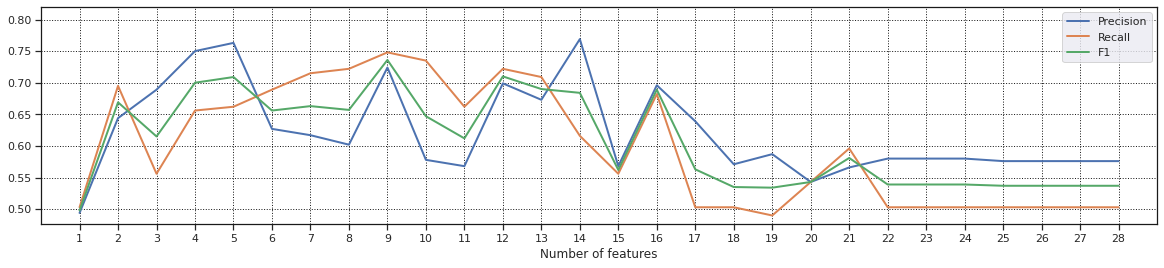

In [21]:
## Plotting precision, recall and F1 score for different set of input features ##
## For each set of features the best number of components and optimal threshold have been used ##

fig, ax = plt.subplots(1, 1)
fig.set_figheight(4)
fig.set_figwidth(20)

ax.grid(True, color='k', linestyle=':')
ax.set_facecolor('w')
for spine in ['left','right','top','bottom']:
  ax.spines[spine].set_color('k')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(range(1, 29), Precision, range(1, 29), Recall, range(1, 29), F1_scores, lw=2)

ax.set_xticks(np.arange(1, 29, 1))
ax.set_yticks(np.arange(0.50, 0.80, 0.05))
ax.set_xlim(0, 29)
ax.set_ylim(top=0.82)

ax.set_xlabel('Number of features')
ax.legend(['Precision', 'Recall', 'F1'])

In [22]:
## Displaying the optimum number of GMM components, precision, recall and F1 score for each model ##

data = {'Number of features': np.arange(1, 29, 1), 'Optimum number of GMM components': best_n_comp, 'Precision': Precision, 'Recall': Recall, 'F1 score': F1_scores}
df_one = pd.DataFrame(data)
print(df_one.to_string(justify='center', index=False))  # Displaying data at the center of their cells

 Number of features  Optimum number of GMM components  Precision  Recall  F1 score
          1                          4                   0.494     0.503    0.498 
          2                          2                   0.644     0.695    0.669 
          3                          2                   0.689     0.556    0.615 
          4                          2                   0.750     0.656    0.700 
          5                          2                   0.763     0.662    0.709 
          6                          9                   0.627     0.689    0.656 
          7                          7                   0.617     0.715    0.663 
          8                          7                   0.602     0.722    0.657 
          9                          6                   0.724     0.748    0.736 
         10                          3                   0.578     0.735    0.647 
         11                          2                   0.568     0.662    0.612 
    

# Approach 2: Two Multivariate Gaussian Mixture Models

In the second approach, for each set of input features, one multivariate Gaussian distribution with multiple components is fitted to non-fraudulent transactions of the training data, and one multivariate Gaussian distribution with multiple components is fitted to the fraudulent transactions of training data. Then the weighted log probabilities of the training samples belonging to these two distributions are calculated and normalized. For each sample in the training data, if the probability of belonging to the GMM fitted to fraudulent transactions is bigger then that transaction is considered fraudulent. If the probability of belonging to the GMM fitted to non-fraudulent transactions is bigger then that transaction is considered non-fraudulent. This combination of two multivariate GMMs will be our classifier. To choose the best combination of the number of components for these two Gussian mixture models, F1 score of the training data is calculated and compared. Finally to asses the performance, precision, recall and F1 score of the test data is represented. 

For this approach, it is observed that the best F1 score for the test data is 0.793 and it happens when 8 features (top 8 features based on AUC) are used and 1 GMM component is applied to non-fraudulent transactions and 7 GMM components are applied to fraudulent transactions. It is also clear that the best F1 score of this approach is better than the best F1 score of the previous approach.

In [ ]:
## Fitting two Gaussian distributions separately to non-fraudulent and fraudulent transactions of the training set ##

best_n_comp = []  # List of tuples including the best number of components for all different sets of input features

Precision = []  # List of precision for test data obtained based on the best number of components 
Recall = []  # List of recall for test data obtained based on the best number of components 
F1_scores = []  # List of F1 scores for test data obtained based on the best number of components 

for i in range(1, 29):  # i is the number of input features

  features = Features[:i]  # List of input features
  print('\n\n\nNumber of features =', len(features))

  F1_list = []  # A list of F1 scores for different number of components to choose the best number of components
  ij =[]  # Saving different number of components for each set of input features 

  ## Generating classifier using training set ##

  for i in range(1, 10):
    for j in range(1, 10):
      N_components_n = i 
      N_components_f = j

      """
      features: list of features
      N_components_n: number of Gaussian components fitted to non-fraudulent transactions of training set
      N_components_f: number of Gaussian components fitted to fraudulent transactions of training set
      """
  
      gm_n = GaussianMixture(n_components = N_components_n, random_state=0)  # Creating a GaussianMixture object - will be used for non-fraudulent transactions
      gm_f = GaussianMixture(n_components = N_components_f, random_state=0)  # Creating a GaussianMixture object - will be used for fraudulent transactions

      if len(features) == 1:  # For one-dimensional input features
        gm_n.fit(X_train[features][y_train==0].values.reshape(-1,1))  # Fitting the GaussianMixture object to non-fraudulent transactions 
        gm_f.fit(X_train[features][y_train==1].values.reshape(-1,1))  # Fitting the GaussianMixture object to fraudulent transactions

        ## Comuting weighted log probabilities of the training data based on the Gaussian distributions fitted separately to non-fraudulent and fraudulent transactions of the training data ##

        p_gm_n = gm_n.score_samples(X_train[features].values.reshape(-1,1))  # For non-fraudulent transactions of the training data
        p_gm_f = gm_f.score_samples(X_train[features].values.reshape(-1,1))  # For fraudulent transactions of the training data

      else:
        gm_n.fit(X_train[features][y_train==0].values)  # Fitting the GaussianMixture object to non-fraudulent transactions
        gm_f.fit(X_train[features][y_train==1].values)  # Fitting the GaussianMixture object to fraudulent transactions 

        ## Comuting weighted log probabilities of the training data based on the Gaussian distributions fitted separately to non-fraudulent and fraudulent transactions of the training data ##

        p_gm_n = gm_n.score_samples(X_train[features].values)  # For non-fraudulent transactions of the training data
        p_gm_f = gm_f.score_samples(X_train[features].values)  # For fraudulent transactions of the training data

      ## Normalizing weighted log probabilities to have them on the same scale ##

      p_gm_n = (p_gm_n - min(p_gm_n)) / (max(p_gm_n) - min(p_gm_n))
      p_gm_f = (p_gm_f - min(p_gm_f)) / (max(p_gm_f) - min(p_gm_f))

      ## Calculating F1 for the training set ##

      F1 = f1_score(y_train, p_gm_n < p_gm_f)    
      F1_list.append(round(F1, 3))

      ij.append((i, j))

  best_ij = ij[F1_list.index(max(F1_list))]
  best_n_comp.append(best_ij)
  N_components_n = best_ij[0]
  N_components_f = best_ij[1]
  print('\n\nBest combination of components:\nNumber of components for non-fraudulent transactions =', N_components_n, '\nNumber of components for fraudulent transactions =', N_components_f)

  ## Assessing performance on the test data ##

  gm_n = GaussianMixture(n_components = N_components_n, random_state=0)  # Creating a GaussianMixture object - will be used for non-fraudulent transactions
  gm_f = GaussianMixture(n_components = N_components_f, random_state=0)  # Creating a GaussianMixture object - will be used for fraudulent transactions

  if len(features) == 1:  # For one-dimensional input features
    gm_n.fit(X_train[features][y_train==0].values.reshape(-1,1))  # Fitting the GaussianMixture object to non-fraudulent transactions 
    gm_f.fit(X_train[features][y_train==1].values.reshape(-1,1))  # Fitting the GaussianMixture object to fraudulent transactions 

    ## Comuting weighted log probabilities of the test data based on the Gaussian distributions fitted separately to non-fraudulent and fraudulent transactions of the test data ##

    p_gm_n = gm_n.score_samples(X_test[features].values.reshape(-1,1))  # For non-fraudulent transactions of the test data
    p_gm_f = gm_f.score_samples(X_test[features].values.reshape(-1,1))  # For fraudulent transactions of the test data

  else: 
    gm_n.fit(X_train[features][y_train==0].values)  # Fitting the GaussianMixture object to non-fraudulent transactions 
    gm_f.fit(X_train[features][y_train==1].values)  # Fitting the GaussianMixture object to fraudulent transactions 

    ## Comuting weighted log probabilities of the test data based on the Gaussian distributions fitted separately to non-fraudulent and fraudulent transactions of the test data ##

    p_gm_n = gm_n.score_samples(X_test[features].values)  # For non-fraudulent transactions of the test data
    p_gm_f = gm_f.score_samples(X_test[features].values)  # For fraudulent transactions of the test data

  ## Normalizing weighted log probabilities to have them on the same scale ##

  p_gm_n = (p_gm_n - min(p_gm_n)) / (max(p_gm_n) - min(p_gm_n))
  p_gm_f = (p_gm_f - min(p_gm_f)) / (max(p_gm_f) - min(p_gm_f))

  ## Calculating F1 for the training set ##

  precision = precision_score(y_test, p_gm_n < p_gm_f)  
  recall = recall_score(y_test, p_gm_n < p_gm_f)  
  F1 = f1_score(y_test, p_gm_n < p_gm_f)  

  Precision.append(round(precision, 3))
  Recall.append(round(recall, 3))  
  F1_scores.append(round(F1, 3))

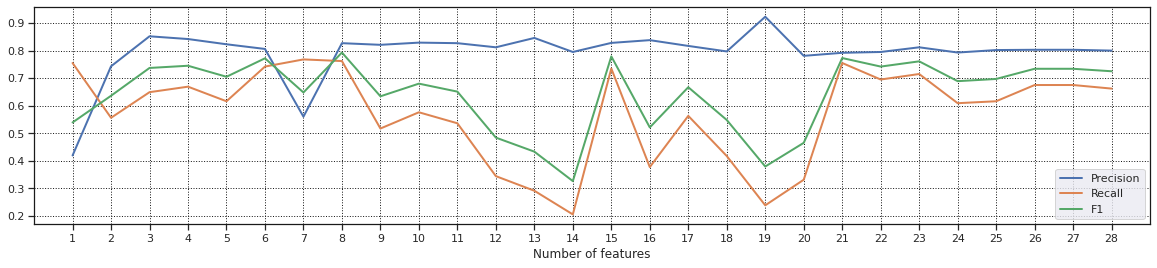

In [24]:
## Plotting precision, recall and F1 score for different set of input features ##
## For each set of features the best number of components has been used ##

fig, ax = plt.subplots(1, 1)
fig.set_figheight(4)
fig.set_figwidth(20)

ax.grid(True, color='k', linestyle=':')
ax.set_facecolor('w')
for spine in ['left','right','top','bottom']:
  ax.spines[spine].set_color('k')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(range(1, 29), Precision, range(1, 29), Recall, range(1, 29), F1_scores, lw=2)

ax.set_xticks(np.arange(1, 29, 1))
ax.set_xlim(0, 29)

ax.set_xlabel('Number of features')
ax.legend(['Precision', 'Recall', 'F1'], loc="lower right")

In [25]:
## Displaying the optimum number of GMM components, precision, recall and F1 score for each model ##

data = {'Number of features': np.arange(1, 29, 1), 'Optimum number of GMM components (non-fraudulent)': [p[0] for p in best_n_comp], 'Optimum number of GMM components (fraudulent)': [p[1] for p in best_n_comp], 'Precision': Precision, 'Recall': Recall, 'F1 score': F1_scores}
df_one = pd.DataFrame(data)
print(df_one.to_string(justify='center', index=False))  # Displaying data at the center of their cells

 Number of features  Optimum number of GMM components (non-fraudulent)  Optimum number of GMM components (fraudulent)  Precision  Recall  F1 score
          1                                  1                                                1                          0.419     0.755    0.539 
          2                                  1                                                1                          0.743     0.556    0.636 
          3                                  1                                                2                          0.852     0.649    0.737 
          4                                  1                                                1                          0.842     0.669    0.745 
          5                                  1                                                9                          0.823     0.616    0.705 
          6                                  1                                                7                       

# Summary

Two approaches based on Gaussian mixture model were presented for anomaly detection. A credit card dataset was used for which fraudulent transactions needed to be detected. In the first approach, for each set of input features a multivariate Gaussian distribution having multiple components was fitted to non-fraudulent transactions of the training set. Then AUC of the training data was calculated for different number of Gaussian components to choose the best number of components for the Gaussian mixture model. For finding the optimal threshold in this analysis, F1 score of the best number of Gaussian components with changing the threshold in the training data was calculated. Optimum threshold happens where F1 score is maximum. For this approach maximum F1 score of the test data happens when 9 features (the top 9 features ordered based on AUC) and 6 GMM components are used. 

In the second approach, for each set of input features, one multivariate Gaussian distribution with multiple components was fitted to non-fraudulent transactions of the training data, and one multivariate Gaussian distribution with multiple components was fitted to the fraudulent transactions of training data. Then the weighted log probabilities of the training samples belonging to these two distributions were calculated and normalized. A classifier were designed based on these probabilities. To choose the best combination of the number of components for these two Gussian distributions, F1 score of the training data was calculated and compared. Finally, for this approach, it was observed that the best F1 score of the test data happens when 8 features (top 8 features based on AUC) are used and 1 GMM component is applied to non-fraudulent transactions and 7 GMM components are applied to fraudulent transactions. The best F1 score of the test data for this approach is better than the best F1 score of the first approach.